In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [37]:
df_2d = pd.read_csv("data_2d.csv")

In [38]:
df_mnist = pd.read_csv("mnist.csv")

In [39]:
K = range(1, 8)

In [51]:
def k_means(frame):
    distortion = []
    for k in K:
        k_meanModel = KMeans(n_clusters=k, n_init='auto')
        k_meanModel.fit(frame)
        distortion.append(k_meanModel.inertia_)

    return distortion

In [52]:
def show_k(distortions):
    plt.figure(figsize=(12,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('distortion')
    plt.title('The Elbow Method for the optimal k')
    plt.show()

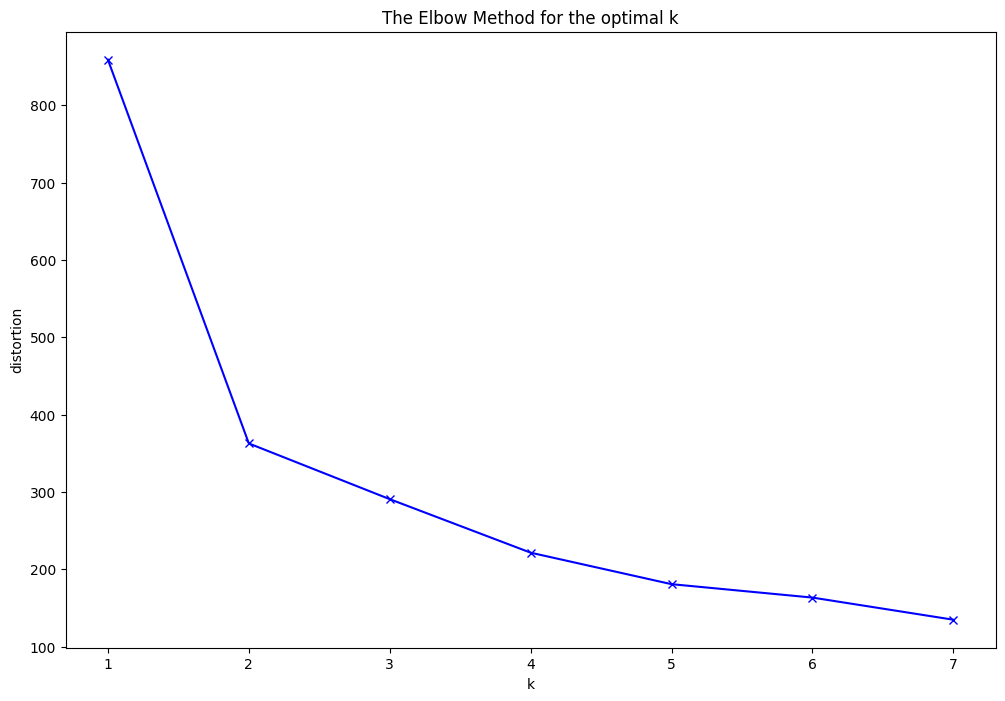

In [53]:
# elbow method for  data_2d
show_k(k_means(df_2d))

In [ ]:
# Optimal k - 2

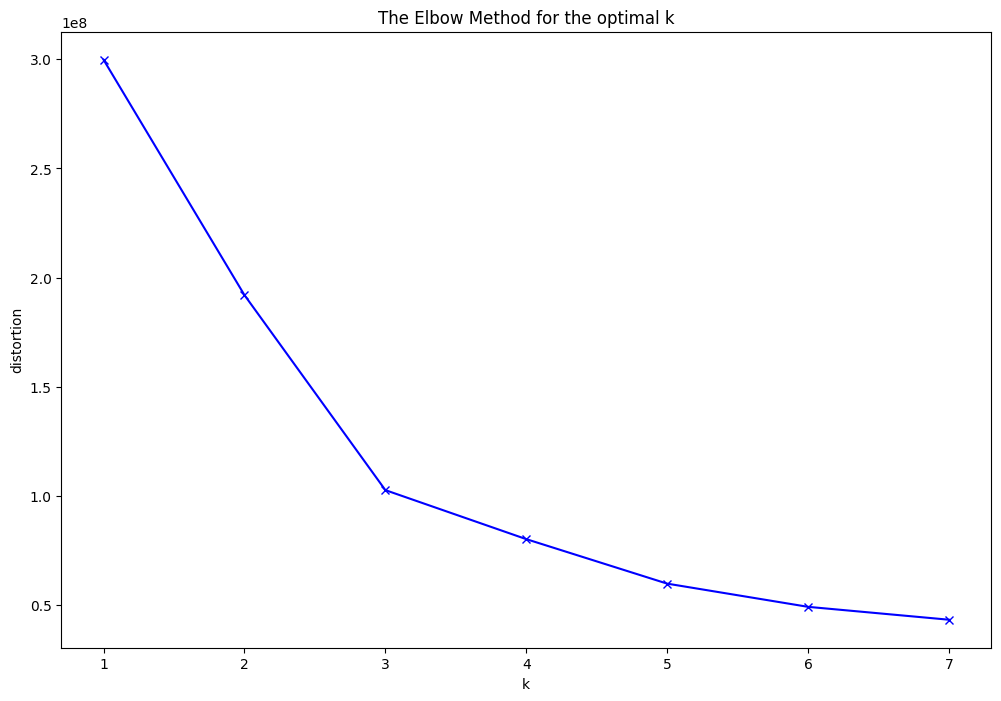

In [54]:
# elbow method for mnist
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(df_mnist)
show_k(k_means(mnist_2d))

In [ ]:
 # Optimal k for mnist_2d - 3

In [55]:
# Task 2
def show_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data)

    plt.figure(figsize=(12,8))
    sns.scatterplot(x=data[:,0], y=data[:,1], c= kmeans.labels_, cmap='cool' )
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

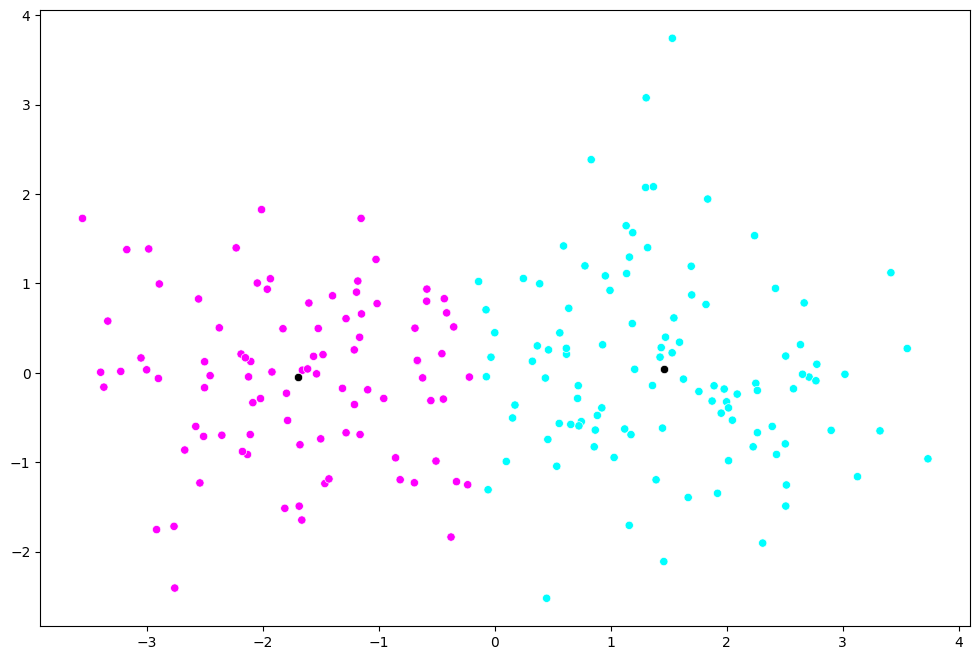

In [57]:
# data_2d
show_clustering(pca.fit_transform(df_2d), 2)

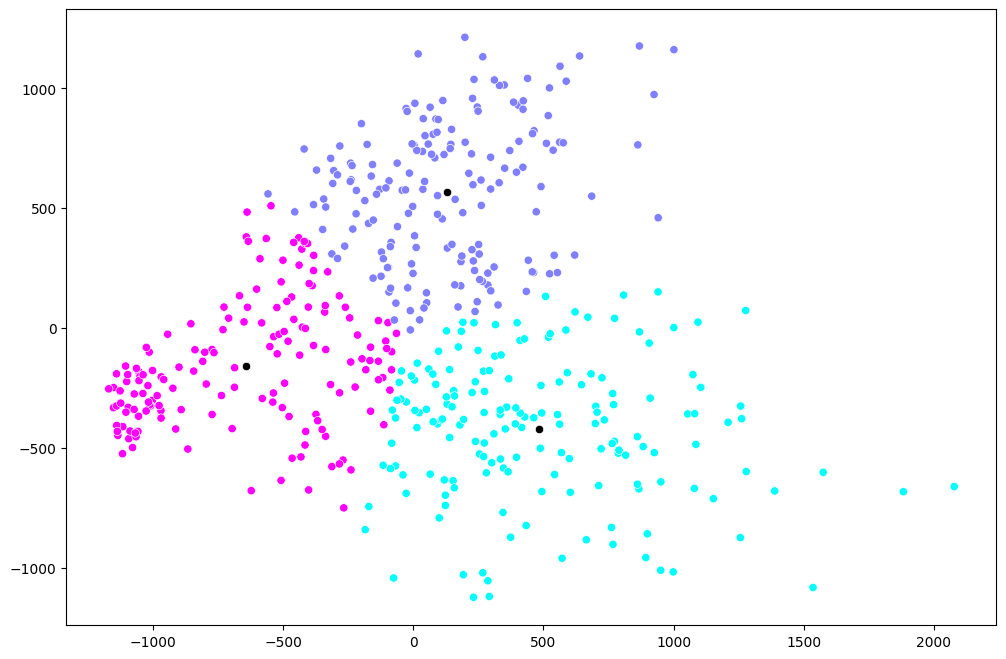

In [58]:
#  mnist_2d
show_clustering(mnist_2d, 3)